# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: High Dimensionality and PCA

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [99]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [100]:
%%html
<style>
.jp-MarkdownCell {background-color: cornsilk;}
.text_cell {background-color: cornsilk;}
</style>

In [101]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

<div class='theme'> Cancer Classification from Gene Expressions </div>

In this assignment, we will build several classification models to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The .csv data file is provided in the compressed file `data/hw5_genes_multiclass.zip`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of leukemia.  Note: there are two different forms of the response variable. 

- The first column contains `Cancer_type`: **0 = ALL** class and **1 = AML** class
- Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample 
- The last column `Cancer_subtype` additionally distinguishes between two subtypes of ALL, subtype T and subtype B (used in problem 5): **0 = ALL subtype T**, **1 = ALL subtype B**, **2 = type AML**. 

In the following questions, we will use logistic regression and PCA to build classification models for this data set. 

## Contents
- [Question 1 [20 pts]: Data Exploration](#Question-1-[20-pts]:-Data-Exploration) 
- [Question 2 [25 pts]: Logistic Regression Modeling](#Question-2-[25-pts]:-Logistic-Regression-Modeling) 
- [Question 3 [20 pts]: Performing Principal Components Analysis](#Question-3-[20-pts]:-Performing-Principal-Components-Analysis)
- [Question 4 [10 pts]: Principal Components Regression (PCR)](#Question-4-[10-pts]:-Principal-Components-Regression-(PCR))
- [Question 5 [25 pts]: Multi-Class Response](#Question-5-[25-pts]:-Multi-Class-Response)

#### <div class='exercise'><b>Question 1 [20 pts]: Data Exploration</b></div>

[▲ Return to contents](#Contents)

The first step is to split the observations into an approximate 75-25 train-test split.  Below we provide some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset shape before splitting and after splitting. `Cancer_type` is our response variable for problems 1-4, while `Cancer_subtype` is the response variable in problem 5.


**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.


**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.

**Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).

**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

---


In [202]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

np.random.seed(109)
#zf = zipfile.ZipFile('data/hw5_genes_multiclass.csv.zip') 
df = pd.read_csv('data/hw5_genes_multiclass.csv')
X = df.drop(['Cancer_type','Cancer_subtype'], axis=1)
X_train, X_test, y_train, y_test, y2_train, y2_test  = train_test_split(
    X, df.Cancer_type, df.Cancer_subtype, test_size=0.25, random_state = 109,
    stratify = df.Cancer_subtype)

print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))

(752, 7131)
(564, 7129) (188, 7129) (564,) (188,)
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64



## Answers

<div class='exercise-r'>  
 
**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.
 
 
 </div>

In [191]:
#Normalize the data 
X_train_norm = (X_train - X_train.min())/(X_train.max() - X_train.min()) 
X_test_norm = (X_test - X_train.min())/(X_train.max() - X_train.min())

y_train

640    0.0
506    1.0
642    0.0
187    0.0
284    0.0
      ... 
658    1.0
625    0.0
454    1.0
287    1.0
476    1.0
Name: Cancer_type, Length: 564, dtype: float64

<div class='exercise-r'>  
 
**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.
 
 
 </div>

Several issues can occur when our p values are larger than our n (data set). three big ones are matrixes that no longer become invertible and multicolinearity can cause issues. In addition to this we are likely to see overfitting. 

<div class='exercise-r'>  
 
**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.
 
 **Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).
 
 </div>

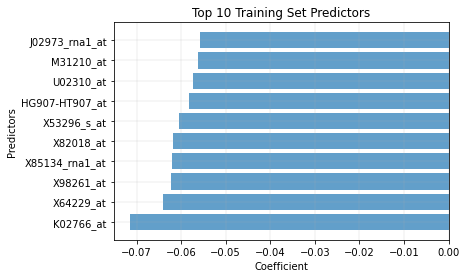

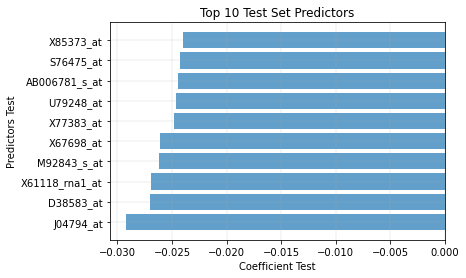

the best predictor from the training data is: K02766_at


In [105]:
#fit linear regression to the data using each predictor, plot the 10 largest coefficients 
best_predictor = pd.DataFrame(columns = ["gene", "coef"]) 

#regression fit
lreg = LinearRegression()
lreg.fit(X_train_norm, y_train)
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

lreg_test = LinearRegression()
lreg_test.fit(X_test_norm, y_test)
coef_dict_test = dict(zip(df.columns[:-1], np.transpose(lreg_test.coef_)))
predictors_test,coefficients_test = list(zip(*sorted(coef_dict_test.items(),key=lambda x: x[1])))

#plot train
fig, ax = plt.subplots()
ax.barh(predictors[0:10],coefficients[0:10], align='center',alpha=0.7, left = None)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
ax.set_title("Top 10 Training Set Predictors")
plt.show()

#plot test
fig, ax = plt.subplots()
ax.barh(predictors_test[0:10],coefficients_test[0:10], align='center',alpha=0.7, left = None)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient Test")
ax.set_ylabel("Predictors Test")
ax.set_title("Top 10 Test Set Predictors")
plt.show()

best_predictor = predictors[0]
print("the best predictor from the training data is:", best_predictor)

<div class='exercise-r'>  
    
**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

In [496]:
logr = LogisticRegression().fit(X_train_norm[['K02766_at']], y_train)
y_pred = logr.predict(X_train_norm[['K02766_at']])

y_pred.sort()


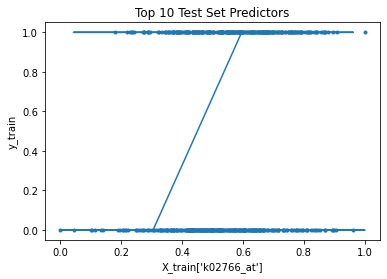

In [495]:
fig, ax = plt.subplots()
ax.plot(X_train_norm[['K02766_at']], y_pred, label = "log reg")
ax.scatter(X_train_norm['K02766_at'], y_train, marker = ".")
ax.set_xlabel("X_train['k02766_at']")
ax.set_ylabel("y_train")
ax.set_title("Top 10 Test Set Predictors")
plt.show()

#still need to fit the basic "eyeballed" logist line to this 

I didn't need to fit the regression line here, but I think a straight line around 0.5 would suffice. So greater than 0.5 = 1, less than 0.5 --> y = 0

#### <div class='exercise'><b>Question 2 [25 pts]: Logistic Regression Modeling</b></div>

[▲ Return to contents](#Contents)

**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model. 
How do accuracies compare to the eye-balled ones from 1.4? 

**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).  
How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.

**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?

**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set. 
Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.

**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.

**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?


## Answers

<div class='exercise-r'>  
 
**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model.
 How do accuracies compare to the eye-balled ones from 1.4?
 
 </div>

In [107]:
# your code here
logr = LogisticRegression()
logr.fit(X_train_norm[['K02766_at']], y_train)

logr_test = LogisticRegression()
logr_test.fit(X_test_norm[['K02766_at']], y_test)

train_accuracy = logr.score(X_train_norm[['K02766_at']], y_train)
test_accuracy = logr_test.score(X_test_norm[['K02766_at']], y_test)

print("train accuracy = %5.3f" %train_accuracy + " test accuracy = %5.3f" %test_accuracy)

train accuracy = 0.571 test accuracy = 0.553


I would expect my classifier from the previous problem to work slightly better than 50 percent of the time, so that is similar in accuracy to what I got her. 

<div class='exercise-r'>  
 
**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).
 How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.
 
 </div>

In [111]:
logit_ovr = LogisticRegression(penalty='none', multi_class='ovr',max_iter = 100).fit(X_train_norm, y_train)
train_accuracy = logit_ovr.score(X_train_norm, y_train)
test_accuracy  = logit_ovr.score(X_test_norm, y_test)

print("train accuracy = %5.3f" %train_accuracy + " test accuracy = %5.3f" %test_accuracy)

train accuracy = 1.000 test accuracy = 0.835


This is a much more accurate fit to the test data. Of course we received a 1.0 accuracy for the training set since the data is overfit due to the large number of p as described in question 1.2

In [131]:
logr.coef_

array([[1.69032433]])

<div class='exercise-r'>  
 
**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?
 
 </div>

In [148]:
column_location = X_train_norm.columns.get_loc("K02766_at")
#checking column length to make sure this checks out 
logit_ovr_coef = logit_ovr.coef_.reshape(-1,1)
print("Coefficient best_predictor simple logistic: %5.3f" %logr.coef_ + " Coefficient best_predictor multiple logistic: %5.3f"% logit_ovr_coef[column_location])

Coefficient best_predictor simple logistic: 1.690 Coefficient best_predictor multiple logistic: 2.784


It is impossible to compare here since the multi-logistic regression makes use of many predictors where as the simple only uses one, we can't look at these two relative to one another in that sense. I will note that it seems like the coefficient value for the multiple logistic value of K02766_at is not exceptionally large relative to other values

*Your answer here*

<div class='exercise-r'>  
 
**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set.
 Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.
 
 </div>

In [152]:
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 5
penalty = 'l1'
solver = 'liblinear'

logit_lasso= LogisticRegressionCV(Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(X_train_norm, y_train)

logit_lasso_score_train = logit_lasso.score(X_train_norm, y_train)
logit_lasso_score_test= logit_lasso.score(X_test_norm, y_test)


print("Score for lasso train: %5.3f" %logit_lasso_score_train + 
      " Score for lasso test: %5.3f" %logit_lasso_score_test)

Score for lasso train: 0.947 Score for lasso test: 0.883


<div class='exercise-r'>  
 
**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.
 
 </div>

Regularization discourages our model from training exceedingly complex versions of the model. This avoids overfitting concerns and thus makes a more universal model for us. For this reason we got a slightly higher test score. 

<div class='exercise-r'>  
    
**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?

In [530]:
# your code here
lasso_df = pd.DataFrame(logit_lasso.coef_)
a = lasso_df.transpose
b = pd.DataFrame(list(a), columns = ['a'])

TypeError: 'method' object is not iterable

*Your answer here*

---

#### <div class='exercise'><b>Question 3 [20 pts]: Performing Principal Components Analysis</b></div>

[▲ Return to contents](#Contents)

**3.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set? 

**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.

**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).

**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

<hr>


## Answers

In [301]:
#Fit the PCA
pca = PCA().fit(X_train)

# apply the pca transformation to the full predictor set and test set
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

#get shapes
train_shape = pca_train.shape
test_shape = pca_test.shape

print("Shape of PCA transformed train: ",train_shape,  
      "Shape of PCA transformed test:",  test_shape )
x_train_shape = X_train.shape
x_test_shape = X_test.shape

print("Shape of X_train: ",x_train_shape,  
      "Shape of X_test:", x_test_shape )

Shape of PCA transformed train:  (564, 564) Shape of PCA transformed test: (188, 564)
Shape of X_train:  (564, 7129) Shape of X_test: (188, 7129)


array([[   742.98481525,  20258.23721906, -28221.70434607, ...,
          1398.62233545,    274.30700308,   -802.21589816],
       [-70311.30706349, -48755.32405089,  80487.86365616, ...,
          1111.65037178,    170.50440017,   3358.66297896],
       [ 15646.24750778,  -1450.50844024,   6476.80678116, ...,
           241.27970299,   -109.17902955,   -170.42298901],
       ...,
       [ 11487.37923128, -21325.79844532,  21790.50607984, ...,
         -1309.57428574,   -478.37771409,   1469.01399398],
       [-32450.1526489 ,  34885.81021685, -11184.89655024, ...,
         -1610.17602896,   -195.78087621,  -1716.01482277],
       [-38515.26585668, -27208.11524539,   7934.80279944, ...,
           160.24938944,   -268.30078929,    613.75267984]])

The limiting factor is the number of rows in the corresponding train/test sets

In [289]:
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(pca_train,y_train)
lr_train_accuracy = lr.score(pca_train,y_train)
lr_test_accuracy = lr.score(pca_test,y_test)
lr_test_accuracy

0.7553191489361702

<div class='exercise-r'>  
 
**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.
 
 </div>

Text(0.5, 1.0, 'cancer type and pca vectors')

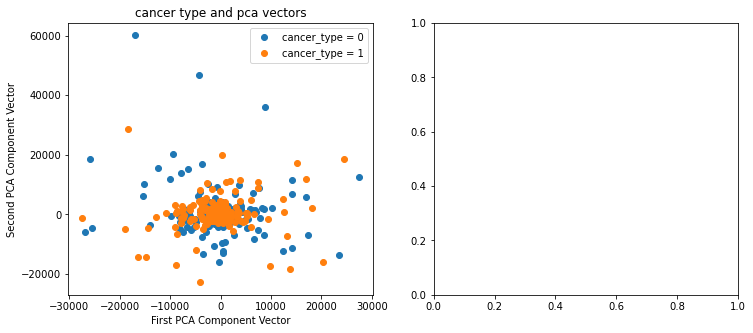

In [565]:

fig,(ax1,ax2) =  plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(pca_train_df[['PCA1']][y_train.values == 1],pca_train_df[['PCA2']][y_train.values == 1])
ax1.scatter(pca_train_df[['PCA1']][y_train.values == 0],pca_train_df[['PCA2']][y_train.values == 0])
ax1.legend(["cancer_type = 0","cancer_type = 1"])
ax1.set_xlabel("First PCA Component Vector")
ax1.set_ylabel("Second PCA Component Vector")
ax1.set_title("cancer type and pca vectors")




The scatterplot is useful in how we can more easily see the seperation in the data sets. This can help us see the spread, outliers, and where the data may be seperable. 

<div class='exercise-r'>  
 
**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).
 
 </div>

In [329]:
var_explained = pca.explained_variance_ratio_
print("Total Variance Explained:", np.sum(var_explained[0:2]))  

Total Variance Explained: 0.12813690930389965


In [361]:
# your code here

for i in range(len(pca_train)):
    var_sum = np.sum(var_explained[0:(i+1)])
    if var_sum > 0.9:
        print("The number of PCA vectors required to explain 90% variance is:", i)
        break

The number of PCA vectors required to explain 90% variance is: 127


<div class='exercise-r'>  
    
**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

0.07701689338764485

Text(0.5, 1.0, 'Difference in Explained Variability of Predictors')

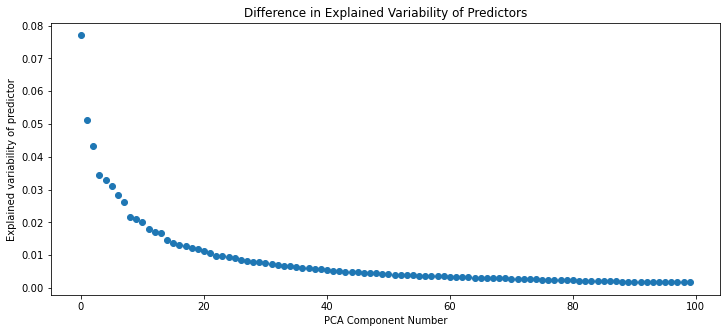

In [362]:
# your code here
a = 100
linear_values = list(range(0,a))

fig,(ax1) =  plt.subplots(1, figsize = (12,5))
ax1.scatter(linear_values, var_explained[0:a] )
ax1.set_xlabel("PCA Component Number")
ax1.set_ylabel("Explained variability of predictor")
ax1.set_title("Difference in Explained Variability of Predictors")

*Your answer here*

#### <div class='exercise'><b>Question 4 [10 pts]: Principal Components Regression (PCR)</b></div>

[▲ Return to contents](#Contents)

**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?

**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well. 


<hr>


## Answers

<div class='exercise-r'>  
 
**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?
 
 </div>

In [397]:
pca_transformer2 = PCA(n_components = 2).fit(X_train_norm)
x_train_2d = pca_transformer2.transform(X_train_norm)
x_test_2d = pca_transformer2.transform(X_test_norm)

pca_transformer500 = PCA(n_components = 500).fit(X_train_norm)
x_train_500d = pca_transformer500.transform(X_train_norm)
x_test_500d = pca_transformer500.transform(X_test_norm)


pca_transformer100 = PCA(n_components = 100).fit(X_train_norm)
x_train_100d = pca_transformer100.transform(X_train_norm)
x_test_100d = pca_transformer100.transform(X_test_norm)


pca_transformer127 = PCA(n_components = 127).fit(X_train_norm)
x_train_127d = pca_transformer127.transform(X_train_norm)
x_test_127d = pca_transformer127.transform(X_test_norm)


In [456]:
x_train_2d

array([[ 0.88584629,  1.36203399],
       [ 1.40698284, -3.03916056],
       [-3.84535641, -0.08801875],
       ...,
       [-1.98722396, -2.27680748],
       [-0.25973251, -1.7763193 ],
       [-3.25949918, -1.75699549]])

*Your answer here*

<div class='exercise-r'>  
    
**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well.

In [388]:
# your code here
from sklearn.model_selection import cross_validate

logr2_cv = cross_validate(logr2, x_train_2d, y_train, scoring = "neg_mean_squared_error", 
                          cv =5, return_train_score = True )
mse_train = -logr2_cv['train_score'].mean()
mse_test = -logr2_cv['test_score'].mean()
print("MSE train score for 2 components: %5.3f" %mse_train)
print("MSE test score for 2 components: %5.3f" %mse_test)


logr100_cv = cross_validate(logr100, x_train_100d, y_train, scoring = "neg_mean_squared_error", 
                          cv =5, return_train_score = True )
mse_train = -logr100_cv['train_score'].mean()
mse_test = -logr100_cv['test_score'].mean()
print("MSE train score for 100 components: %5.3f" %mse_train)
print("MSE test score for 100 components: %5.3f" %mse_test)


logr127_cv = cross_validate(logr127, x_train_127d, y_train, scoring = "neg_mean_squared_error", 
                         cv =5, return_train_score = True )
mse_train = -logr127_cv['train_score'].mean()
mse_test = -logr127_cv['test_score'].mean()
print("MSE train score for 127 components: %5.3f" %mse_train)
print("MSE test score for 127 components: %5.3f" %mse_test)


logr500_cv = cross_validate(logr500, x_train_500d, y_train, scoring = "neg_mean_squared_error", 
                         cv =5, return_train_score = True )
mse_train = -logr500_cv['train_score'].mean()
mse_test = -logr500_cv['test_score'].mean()
print("MSE train score for 500 components: %5.3f" %mse_train)
print("MSE test score for 500 components: %5.3f" %mse_test)

MSE train score for 2 components: 0.240
MSE test score for 2 components: 0.252
MSE train score for 100 components: 0.096
MSE test score for 100 components: 0.168
MSE train score for 127 components: 0.082
MSE test score for 127 components: 0.183
MSE train score for 500 components: 0.005
MSE test score for 500 components: 0.190


#### <div class='exercise'><b>Question 5 [25 pts]: Multi-Class Response</b></div>

[▲ Return to contents](#Contents)

As mentioned earlier, there are actually two subtypes of `ALL` cancer: B-cell and T-cell.  The variable `Cancer_subtype` designates the 3 cancer cubtypes: 
- 0 = ALL Type T, 
- 1 = ALL Type B, and 
- 2 = AML.  
Use this updated response variable to answer the following questions:

**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.

**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?

**Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**

**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.

**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?

**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).  

Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.

<hr>


## Answers

<div class='exercise-r'>  
 
**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.
 
 </div>

In [474]:
x_train_2d_df= pd.DataFrame(x_train_2d, columns = ['PCA1', 'PCA2'])
x_train_2d_df
x_test_2d_df= pd.DataFrame(x_test_2d, columns = ['PCA1', 'PCA2'])
x_test_2d_df

,PCA1,PCA2
0,0.093096,-2.243948
1,-0.533232,10.363911
2,-2.523572,-0.283694
3,1.242871,-0.240677
4,-2.355641,4.005102
...,...,...
183,2.235227,0.793359
184,-4.057451,-1.981752
185,-4.080350,-1.178090
186,8.898649,-0.693647


In [567]:
logit_ridge2 = LogisticRegression( max_iter = 5000, C = 10000).fit(x_train_2d, y2_train)
logit2_score_train = logit_ridge2.score(x_train_2d, y2_train)
logit2_score_test = logit_ridge2.score(x_test_2d, y2_test)
print("Accuracy score train for 2 PCA components Ridge-like: %5.3f" %logit2_score_train)
print("Accuracy score test for 2 PCA components Ridge-like: %5.3f" %logit2_score_test)


#create interaction term
quadint_df = pd.DataFrame([x_train_2d_df['PCA1'],x_train_2d_df['PCA2'],x_train_2d_df['PCA1']*x_train_2d_df['PCA2'], x_train_2d_df['PCA1']*x_train_2d_df['PCA1'], x_train_2d_df['PCA2']*x_train_2d_df['PCA2']], 
                           index=[['PCA1', 'PCA2','Interaction','Quad1','Quad2']])
quadint_df = quadint_df.transpose()

quadint_df_test = pd.DataFrame([x_test_2d_df['PCA1'],x_test_2d_df['PCA2'],x_test_2d_df['PCA1']*x_test_2d_df['PCA2'], x_test_2d_df['PCA1']*x_test_2d_df['PCA1'], x_test_2d_df['PCA2']*x_test_2d_df['PCA2']], 
                           index=[['PCA1', 'PCA2','Interaction','Quad1','Quad2']])
quadint_df_test = quadint_df_test.transpose()

#fit the data and get score
logit_ridge5 = LogisticRegression(max_iter = 5000, C = .0001).fit(quadint_df, y2_train)
logit5_score_train = logit_ridge5.score(quadint_df, y2_train)
logit5_score_test = logit_ridge5.score(quadint_df_test, y2_test)

print("Accuracy score train for 5 components Ridge-like: %5.3f" %logit5_score_train)
print("Accuracy score test for 5 components Ridge-like: %5.3f" %logit5_score_test)

Accuracy score train for 2 PCA components Ridge-like: 0.663
Accuracy score test for 2 PCA components Ridge-like: 0.654
Accuracy score train for 5 components Ridge-like: 0.523
Accuracy score test for 5 components Ridge-like: 0.537


the accuracy for the 5 components and the interaction terms are slightly better on the test set than when we only used the 2 dimensions. However this is not a significant amount worth the work. This tells me that the PCA method itself does a good enough job of capturing the interactions. Additional interaction terms and quadratics are unnecessary. 

*Your answer here*

<div class='exercise-r'>  
 
**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?
 
 **Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**
 
 </div>

Text(0.5, 1.0, 'cancer type and pca vectors')

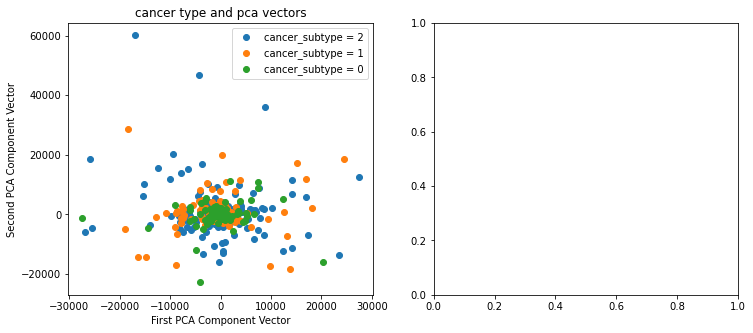

In [579]:
fig,(ax1,ax2) =  plt.subplots(1, 2, figsize = (12,5))
ax1.scatter(pca_train_df[['PCA1']][y2_train.values == 2],pca_train_df[['PCA2']][y2_train.values == 2])
ax1.scatter(pca_train_df[['PCA1']][y2_train.values == 1],pca_train_df[['PCA2']][y2_train.values == 1])
ax1.scatter(pca_train_df[['PCA1']][y2_train.values == 0],pca_train_df[['PCA2']][y2_train.values == 0])
ax1.legend(["cancer_subtype = 2","cancer_subtype = 1","cancer_subtype = 0" ])
ax1.set_xlabel("First PCA Component Vector")
ax1.set_ylabel("Second PCA Component Vector")
ax1.set_title("cancer type and pca vectors")

it seems like I'm doing something incorrect here since the boundaries seem to be non-existent. Not sure why this is happening

<div class='exercise-r'>  
 
**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.
 
 </div>

In [566]:
components = [2, 5, 10, 15, 20, 50, 100] 
mse_train= []
mse_test = []

for i in components:
    pca_transformer = PCA(n_components = i).fit(X_train_norm)
    x_train = pca_transformer.transform(X_train_norm)
    logit_ridge_comp = LogisticRegression( max_iter = 5000, C = 100000, solver='lbfgs').fit(x_train, y2_train)
    logr_cv = cross_validate(logit_ridge_comp, x_train, y2_train, scoring = "neg_mean_squared_error", cv = 5, return_train_score = True )
    
    mse_train.append(-logr_cv['train_score'].mean())
    mse_test.append(-logr_cv['test_score'].mean())

print("mse_train:")
display(mse_train)
print("mse_test:")
display(mse_test)


mse_train:


[0.6152649961736947,
 0.4658615073680906,
 0.4210927535663128,
 0.3709985675882503,
 0.35373015717285095,
 0.3080813531385515,
 0.19149186664835272]

mse_test:


[0.6471080910240202,
 0.49639696586599247,
 0.4663716814159292,
 0.3811946902654867,
 0.3687104930467762,
 0.4043457648546144,
 0.6064791403286979]

The 20 component model had the lowest test MSE score from the models that we created. This would be the one that I go with. You can see when we go past 20 to 50, we begin to overfit our model. 

<div class='exercise-r'>  
 
**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?
 
 </div>

In [578]:
y2_train_df = pd.DataFrame(y2_train)
y2_train_df.apply(pd.value_counts)


,Cancer_subtype
2,275
1,190
0,99


In [575]:
# your code here
pca_transformer = PCA(n_components = 20).fit(X_train_norm)
pca_transformer = PCA(n_components = i).fit(X_train_norm)
x_train = pca_transformer.transform(X_train_norm)
x_test = pca_transformer.transform(X_test_norm)

logit_ridge_comp = LogisticRegression( max_iter = 5000, C = 100000, solver='lbfgs').fit(x_train, y2_train)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 0], y2_train[y2_train.values == 0])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 0], y2_test[y2_test.values == 0])
print("train_accuracy y = 0:",train_accuracy)
print("test_accuracy y = 0:", test_accuracy)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 1], y2_train[y2_train.values == 1])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 1], y2_test[y2_test.values == 1])
print("train_accuracy y = 1:",train_accuracy)
print("test_accuracy y = 1:", test_accuracy)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 2], y2_train[y2_train.values == 2])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 2], y2_test[y2_test.values == 2])
print("train_accuracy y = 2:",train_accuracy)
print("test_accuracy y = 2:", test_accuracy)


train_accuracy y = 0: 0.6767676767676768
test_accuracy y = 0: 0.5454545454545454
train_accuracy y = 1: 0.8315789473684211
test_accuracy y = 1: 0.6825396825396826
train_accuracy y = 2: 0.9272727272727272
test_accuracy y = 2: 0.8369565217391305


This makes sense given the lower count of 0 values in the y2_train set. This means that the regression has less data to train off of and thus will not be as refined. In comparison, 2 has the most values and thus we have the highest accuracy for it because we are better able to build our predictive model to this class. 

<div class='exercise-r'>  
 
**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
 Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).
 
 Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.
 </div>

In [587]:
np.append(x_train, x_train[y2_train.values == 0])
np.append(y2_train, y2_train[y2_train.values == 0])

logit_ridge_comp = LogisticRegression( max_iter = 5000, C = 100000, solver='lbfgs').fit(x_train, y2_train)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 0], y2_train[y2_train.values == 0])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 0], y2_test[y2_test.values == 0])
print("train_accuracy y = 0:",train_accuracy)
print("test_accuracy y = 0:", test_accuracy)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 1], y2_train[y2_train.values == 1])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 1], y2_test[y2_test.values == 1])
print("train_accuracy y = 1:",train_accuracy)
print("test_accuracy y = 1:", test_accuracy)

train_accuracy = logit_ridge_comp.score(x_train[y2_train.values == 2], y2_train[y2_train.values == 2])
test_accuracy = logit_ridge_comp.score(x_test[y2_test.values == 2], y2_test[y2_test.values == 2])
print("train_accuracy y = 2:",train_accuracy)
print("test_accuracy y = 2:", test_accuracy)


train_accuracy y = 0: 0.6767676767676768
test_accuracy y = 0: 0.5454545454545454
train_accuracy y = 1: 0.8315789473684211
test_accuracy y = 1: 0.6825396825396826
train_accuracy y = 2: 0.9272727272727272
test_accuracy y = 2: 0.8369565217391305


I wasn't sure how to increase the weights, so I increased the weights by doubling back the y2_samples for '0' to increase the weight. This strategy did not increase the weighting as I hoped unfortunately. Was really running out of time at the end here, this homework, like most others past has taken me around 15 hours to complete.